In [1]:
from scipy.optimize import fmin
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

#Makes the diagrams look nice and shiny
plt.rcParams['figure.figsize']=(14,6)
plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=16)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)

def getSSE(slope1, slope2):
    square_residual = (slope1 - slope2)**2.0
    sum_square_error = sum(square_residual)
    return sum_square_error

#2nd order polynomials
def fit2nd(params, theta):
    a, b = params
    BE = a*theta + b*theta**2
    return BE

def minimize_2nd(params, theta, BEs):
    BEs_predicted = fit2nd(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

o_theta = np.array([0,1/9, 1/4, 2/4, 3/4])
o_hcov=(np.array([-4.80074222,-4.80074222, -4.80074222, -3.90025122, -3.39944622]))
o_hcov-=o_hcov[0]

co_theta = np.array([0,1/9, 1/4, 2/4, 3/4,1])
co_hcov=(np.array([-1.8206652,-1.8206652, -1.8206652,-1.6998762, -0.7488825333,-0.2436987]))
co_hcov-=co_hcov[0]

c_theta = np.array([0,1/9, 1/4, 2/4, 1])
c_hcov=(np.array([-6.53936813,-6.53936813, -6.53936813,-5.85327963, -4.77545638]))
c_hcov-=c_hcov[0]

Optimization terminated successfully.
         Current function value: 0.091642
         Iterations: 47
         Function evaluations: 90
Optimization terminated successfully.
         Current function value: 0.090149
         Iterations: 42
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 0.058214
         Iterations: 45
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.131553
         Iterations: 59
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.007297
         Iterations: 47
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.032869
         Iterations: 47
         Function evaluations: 92


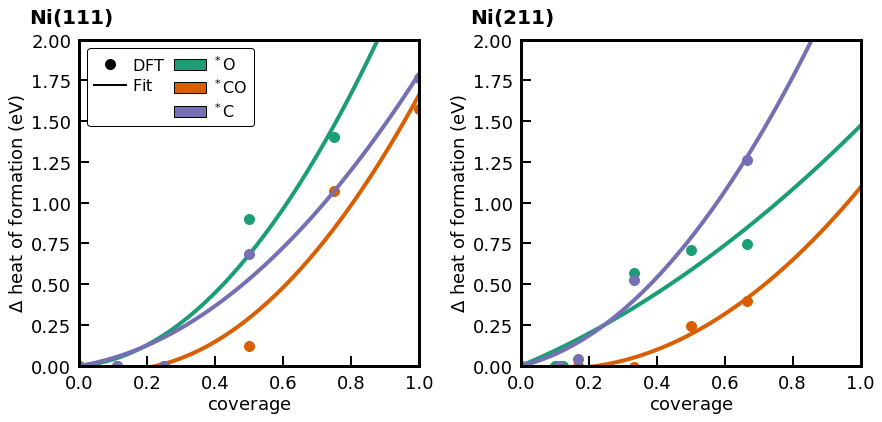

In [6]:

guess_2nd = (-1.0, 2.0)

o = fmin(func=minimize_2nd, x0=guess_2nd, args=(o_theta, o_hcov))
co = fmin(func=minimize_2nd, x0=guess_2nd, args=(co_theta, co_hcov))
c = fmin(func=minimize_2nd, x0=guess_2nd, args=(c_theta, c_hcov))

poly_covs = np.linspace(0., 1., 101)
o_poly_hcov = fit2nd(o, poly_covs)
co_poly_hcov = fit2nd(co, poly_covs)
c_poly_hcov = fit2nd(c, poly_covs)

gs=gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.3, hspace=0.2)

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[0,1])

ax0.set_ylabel('$\mathrm{\Delta\ heat\ of\ formation\ (eV)}$')
ax0.set_ylim([0, 2])
ax0.set_xlim([0, 1])
ax0.set_xlabel('$\mathrm{coverage}$')

patch_OX=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{^*O}$')
patch_COX=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{^*CO}$')
patch_CX=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{^*C}$')

ax0.plot(o_theta, o_hcov, color=colors[0], marker='o', linestyle='none')
ax0.plot(poly_covs, o_poly_hcov, color=colors[0])

ax0.plot(co_theta, co_hcov, color=colors[1], marker='o', linestyle='none')
ax0.plot(poly_covs, co_poly_hcov, color=colors[1])

ax0.plot(c_theta, c_hcov, color=colors[2], marker='o', linestyle='none')
ax0.plot(poly_covs, c_poly_hcov, color=colors[2])
#dummys
ax0.plot(100, 100, color='k',marker='o', linewidth=2,linestyle='None', label='$\mathrm{DFT}$')
ax0.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{Fit}$')
ax0.plot(100, 100, color='w',marker='None', linewidth=2,linestyle='solid', label=' ')

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles=[handles[0], handles[1],handles[2], patch_OX,patch_COX,patch_CX], ncol=2)

o211_theta = np.array([0,1/10,1/9,1/8, 1/6, 1/3, 1/2,2/3])
o211_hcov=(np.array([-4.8770431, -4.8770431,-4.8770431,-4.8770431, -4.8813662, -4.3074717, -4.168133553, -4.1298612]))
o211_hcov-=o211_hcov[0]

co211_theta = np.array([0,1/9, 1/6, 1/3, 1/2,2/3])
co211_hcov=(np.array([-1.8167901,-1.8167901, -1.8150912,-1.8268087, -1.569983867,-1.4166892]))
co211_hcov-=co211_hcov[0]

c211_theta = np.array([0,1/9, 1/6, 1/3, 2/3])
c211_hcov=(np.array([-7.3340621,-7.3340621, -7.2952501,-6.8076581, -6.0712436]))
c211_hcov-=c211_hcov[0]

o211 = fmin(func=minimize_2nd, x0=guess_2nd, args=(o211_theta, o211_hcov))
co211 = fmin(func=minimize_2nd, x0=guess_2nd, args=(co211_theta, co211_hcov))
c211 = fmin(func=minimize_2nd, x0=guess_2nd, args=(c211_theta, c211_hcov))

poly_covs = np.linspace(0., 1., 101)
o211_poly_hcov = fit2nd(o211, poly_covs)
co211_poly_hcov = fit2nd(co211, poly_covs)
c211_poly_hcov = fit2nd(c211, poly_covs)

ax1.set_ylabel('$\mathrm{\Delta\ heat\ of\ formation\ (eV)}$')
ax1.set_ylim([0, 2])
ax1.set_xlim([0, 1])
ax1.set_xlabel('$\mathrm{coverage}$')

ax1.plot(o211_theta, o211_hcov, color=colors[0], marker='o', linestyle='none')
ax1.plot(poly_covs, o211_poly_hcov, color=colors[0])

ax1.plot(co211_theta, co211_hcov, color=colors[1], marker='o', linestyle='none')
ax1.plot(poly_covs, co211_poly_hcov, color=colors[1])

ax1.plot(c211_theta, c211_hcov, color=colors[2], marker='o', linestyle='none')
ax1.plot(poly_covs, c211_poly_hcov, color=colors[2])

ax0.text(-0.15, 1.05, '$\mathbf{Ni(111)}$', transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.15, 1.05, '$\mathbf{Ni(211)}$', transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('coverage_dependence_Ni.pdf', bbox_inches='tight', transparent=False)

In [7]:
print(o)
print(co)
print(c)

[0.16063238 2.40956365]
[-0.48732937  2.14911651]
[0.33924174 1.45140887]


In [8]:
print(o211)
print(co211)
print(c211)

[0.87441913 0.59883675]
[-0.31804162  1.41287108]
[0.49469333 2.14873445]
